## Install `wandb` and log in

If you don't yet have a Weights and Biases account you can create one here: https://wandb.ai/login?signup=true

In [1]:
!git clone https://github.com/PaddlePaddle/PaddleOCR
!pip install -qqq paddlepaddle-gpu pyclipper attrdict
%cd PaddleOCR
!pip install -e .

Cloning into 'PaddleOCR'...
remote: Enumerating objects: 86509, done.
remote: Counting objects: 100% (818/818), done.
remote: Compressing objects: 100% (88/88), done.
remote: Total 86509 (delta 783), reused 730 (delta 730), pack-reused 85691 (from 2)
Receiving objects: 100% (86509/86509), 563.30 MiB | 16.26 MiB/s, done.
Resolving deltas: 100% (64981/64981), done.
Updating files: 100% (2022/2022), done.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 758.9/758.9 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 912.2/912.2 kB 33.9 MB/s eta 0:00:00
/content/PaddleOCR
Obtaining file:///content/PaddleOCR
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 8.5 MB/s eta 0:00:00
  Preparing 

In [2]:
!unzip /content/dataset.zip -d /content/dataset

Archive:  /content/dataset.zip
   creating: /content/dataset/dataset/
   creating: /content/dataset/dataset/train/
  inflating: /content/dataset/dataset/train/72F147682_20241221_154816.jpg  
  inflating: /content/dataset/dataset/train/71B224901_20241221_172449.jpg  
  inflating: /content/dataset/dataset/train/51L00805_20241221_160550.jpg  
  inflating: /content/dataset/dataset/train/57H04020_20241221_160210.jpg  
  inflating: /content/dataset/dataset/train/60B02992_20241221_165020.jpg  
  inflating: /content/dataset/dataset/train/51K05840_20241221_072336.jpg  
  inflating: /content/dataset/dataset/train/51H41298_20241221_152647.jpg  
  inflating: /content/dataset/dataset/train/59X276326_20241221_064405.jpg  
  inflating: /content/dataset/dataset/train/76G149019_20241221_163447.jpg  
  inflating: /content/dataset/dataset/train/79N212759_20241221_164929.jpg  
  inflating: /content/dataset/dataset/train/50E09983_20241221_172458.jpg  
  inflating: /content/dataset/dataset/train/50H37973_20

In [ ]:
!unzip /content/best_accuracy.zip -d /content/best_accuracy

Archive:  /content/best_accuracy.zip
   creating: /content/best_accuracy/kaggle/working/output/en_PP-OCRv3_rec_ft/best_accuracy/
  inflating: /content/best_accuracy/kaggle/working/output/en_PP-OCRv3_rec_ft/best_accuracy/best_accuracy.pdopt  
  inflating: /content/best_accuracy/kaggle/working/output/en_PP-OCRv3_rec_ft/best_accuracy/best_accuracy.pdparams  
  inflating: /content/best_accuracy/kaggle/working/output/en_PP-OCRv3_rec_ft/best_accuracy/best_accuracy.states  


In [3]:
!cat /content/dataset/dataset/en_PP-OCRv3_rec.yml

Global:
  debug: false
  use_gpu: true
  epoch_num: 400
  log_smooth_window: 20
  print_batch_step: 10
  save_model_dir: ./output/en_PP-OCRv3_rec_ft
  save_epoch_step: 200
  eval_batch_step: [0, 100, 200, 300, 400]
  cal_metric_during_train: true
  pretrained_model: ./en_PP-OCRv3_rec_train/best_accuracy.pdparams
  checkpoints: null
  save_inference_dir: null
  use_visualdl: false
  infer_img: ./dataset/dataset/test/50H56290_20241221_171003.jpg
  character_dict_path: ./PaddleOCR/ppocr/utils/en_dict.txt
  max_text_length: &max_text_length 20
  infer_mode: false
  use_space_char: true
  distributed: true
  save_res_path: ./output/rec/predicts_ppocrv3.txt


Optimizer:
  name: Adam
  beta1: 0.9
  beta2: 0.999
  lr:
    name: Cosine
    learning_rate: 0.005
    warmup_epoch: 5
  regularizer:
    name: L2
    factor: 3.0e-05


Architecture:
  model_type: rec
  algorithm: SVTR
  Transform:
  Backbone:
    name: MobileNetV1Enhance
    scale: 0.5
    last_conv_stride: [1, 2]
    last_pool_type: 

In [ ]:
#### Sửa line 165 file /content/PaddleOCR/ppocr/utils/export_model.py thành ->
#### paddle.static.InputSpec(shape=[None] + [3, 48, 320], dtype="float32"),

!python /content/PaddleOCR/tools/export_model.py -c /content/dataset/dataset/en_PP-OCRv3_rec.yml \
  -o Global.pretrained_model=/content/best_accuracy/best_accuracy.pdparams \
   Global.save_inference_dir=/content/inference/

W1223 17:21:33.623643  7247 gpu_resources.cc:119] Please NOTE: device: 0, GPU Compute Capability: 7.5, Driver API Version: 12.2, Runtime API Version: 11.8
W1223 17:21:33.624696  7247 gpu_resources.cc:164] device: 0, cuDNN Version: 8.9.
[2024/12/23 17:21:34] ppocr INFO: load pretrain successful from /content/best_accuracy/kaggle/working/output/en_PP-OCRv3_rec_ft/best_accuracy/best_accuracy
[2024/12/23 17:21:34] ppocr INFO: Export inference config file to /content/inference/inference.yml
I1223 17:21:35.788435  7247 program_interpreter.cc:212] New Executor is Running.
[2024/12/23 17:21:35] ppocr INFO: inference model is saved to /content/inference/inference


In [ ]:
!zip -r /content/inference.zip /content/inference # Download inference.zip

In [32]:
!unzip /content/inference.zip -d /content/inference # Unzip to inference

Archive:  /content/inference.zip
   creating: /content/inference/inference/
  inflating: /content/inference/inference/inference.pdmodel  
  inflating: /content/inference/inference/inference.pdiparams.info  
  inflating: /content/inference/inference/inference.yml  
  inflating: /content/inference/inference/inference.pdiparams  


In [42]:
from paddleocr import PaddleOCR
import re
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Example usage
custom_rec_model_dir = "/content/inference/inference"
ocr = PaddleOCR(
    det_model_dir=None,  # No detection model used
    rec_model_dir=custom_rec_model_dir,  # Path to the fine-tuned recognition model
    use_angle_cls=False,  # Do not use angle classification
    lang="en"  # Language set to English
)

[2024/12/23 19:13:54] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=True, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/content/inference/inference', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dic

In [38]:
def ocr_plate(img_path, ocr):
    """
    Extract all license plate texts and their corresponding confidence scores from the OCR results.
    :param text: The OCR result from PaddleOCR.
    :return: A list of tuples containing plate text and confidence score.
    """
    text = ocr.ocr(img_path, det=False, rec=True, cls=False)

    plate_confidences = []

    # Check if OCR result is not empty
    if text:
        for item in text[0]:
            # Extract plate text and confidence score for each result
            plate_text = item[0]  # This is the recognized text (e.g., '18H178330')
            confidence_score = item[1]  # This is the confidence score (e.g., 0.996)

            # Append as a tuple to the list
            plate_confidences.append(f"{plate_text} {confidence_score}")

    return plate_confidences

['49K184048 0.9817747473716736']


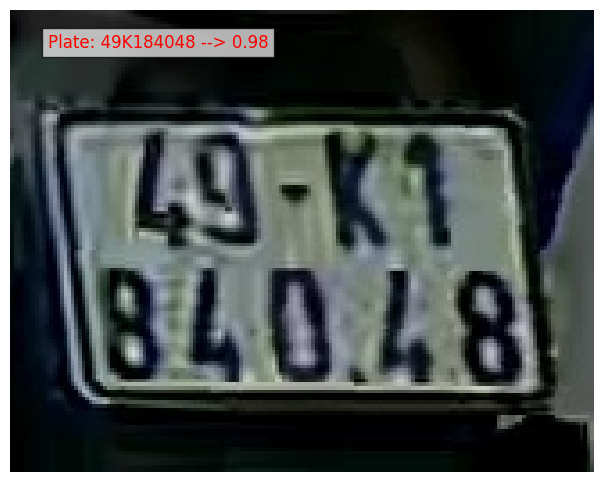

In [43]:
img_path = '/content/dataset/dataset/test/49K184048_20241221_163635.jpg'

result = ocr_plate(img_path, ocr)
print(result)

# Tách chuỗi đầu ra thành biển số và confidence score
plate_texts = []
confidence_scores = []

for item in result:
    parts = item.split(' ')  # Tách chuỗi bằng khoảng trắng
    plate_texts.append(parts[0])  # Lấy biển số
    confidence_scores.append(float(parts[1]))  # Chuyển phần confidence thành float

# Đọc ảnh và hiển thị bằng matplotlib
image = cv2.imread(img_path)

# Chuyển đổi màu sắc từ BGR (OpenCV mặc định) sang RGB (matplotlib)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Hiển thị ảnh
plt.figure(figsize=(10, 6))
plt.imshow(image_rgb)
plt.axis('off')  # Tắt trục tọa độ

# Thêm nhãn cho biển số (sử dụng OCR kết quả)
for i, (plate, conf) in enumerate(zip(plate_texts, confidence_scores)):
    plt.text(10, 10 + i * 40, f"Plate: {plate} --> {conf:.2f}", fontsize=12, color='red', bbox=dict(facecolor='white', alpha=0.7))

# Hiển thị ảnh với nhãn
plt.show()

In [44]:

import os
# Đường dẫn file chứa danh sách ảnh và nhãn
test_file_path = "/content/dataset/dataset/rec_gt_test.txt"

# Đường dẫn thư mục chứa ảnh
test_images_dir = "/content/dataset/dataset/test"


# Đọc file test và thực hiện OCR
total_images = 0
correct_predictions = 0

with open(test_file_path, "r", encoding="utf-8") as file:
    lines = file.readlines()

    for line in lines:
        parts = line.strip().split('\t')  # Tách ảnh và nhãn thật
        if len(parts) != 2:
            continue

        img_path, true_label = parts
        # print(img_path)
        img_path = os.path.join(test_images_dir, os.path.basename(img_path))  # Đường dẫn đầy đủ

        # Sử dụng hàm ocr_text để nhận diện văn bản từ ảnh
        result = ocr_plate(img_path, ocr)
        predicted_label, conf = result[0].split(" ")
        # So sánh với nhãn thật
        if predicted_label == true_label:
            correct_predictions += 1

        total_images += 1

# Tính toán Accuracy
accuracy = correct_predictions / total_images * 100
print(f"Accuracy: {accuracy:.2f}% ({correct_predictions}/{total_images})")

Accuracy: 82.33% (247/300)
